In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [3]:
from joblib import load
from global_vs_local_surrogate import massive_load_agnostic_local_explainers
from agnosticglobalexplainer import load_shapelet_model

/Users/francesco/anaconda3/envs/tesi/lib/python3.6/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
Using TensorFlow backend.


In [4]:
folder_name = "cbf_20191223_122259"

In [5]:
global_surrogate = load_shapelet_model(parentdir + "/agnostic_explainers/" + folder_name + "/")
agnostic_explainers = massive_load_agnostic_local_explainers(parentdir + "/agnostic_explainers/" + folder_name + "/", 
                                                             verbose = True, 
                                                             load_shapelet_explainers = False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [6]:
# agnostic_explainers is a list of agnostic explainers
# for example we can take the first one
agnostic = agnostic_explainers[0]

In [7]:
# rules dataframes is a dictionary with all the rules
agnostic.rules_dataframes["rule"]["df"]

array([[ 0.31983593,  0.07619023, -0.05216306, ..., -0.10426986,
         0.2946417 , -0.2942521 ],
       [ 0.33830917,  0.11353832, -0.01060498, ..., -0.1161871 ,
         0.3270258 , -0.32906657],
       [ 0.36096609,  0.11162245,  0.03524446, ..., -0.12239408,
         0.3467274 , -0.33756536],
       ...,
       [ 0.46186405, -0.06938523,  0.05664319, ..., -0.06587464,
         0.20410717, -0.11169761],
       [ 0.61984783,  0.24489382,  0.38970733, ..., -0.19207615,
         0.4238427 , -0.28412098],
       [ 0.624107  ,  0.23622009,  0.39006644, ..., -0.18646514,
         0.42091566, -0.28103161]])

In [9]:
agnostic.print_rules_n()

rule: 446 time series
crule0: 44 time series
crule1: 461 time series
crule2: 5 time series


In [10]:
# checks if generated new samples that satisfy a rule are of the right class
agnostic.rules_check_by_augmentation()

rule generated instances have 0.98 accuracy
crule0 generated instances have 1.0 accuracy
crule1 generated instances have 0.984 accuracy
crule2 generated instances have 0.934 accuracy
rule: 446 time series
crule0: 44 time series
crule1: 461 time series
crule2: 5 time series


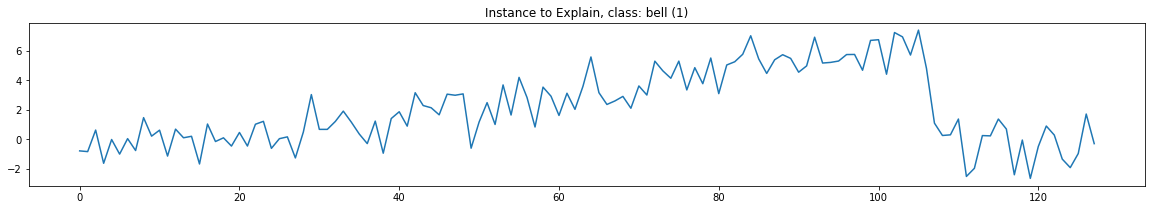

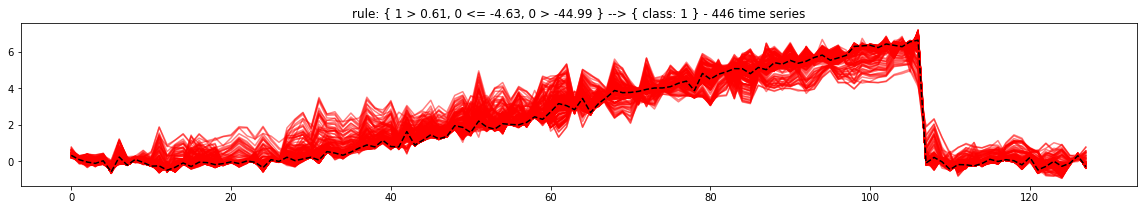

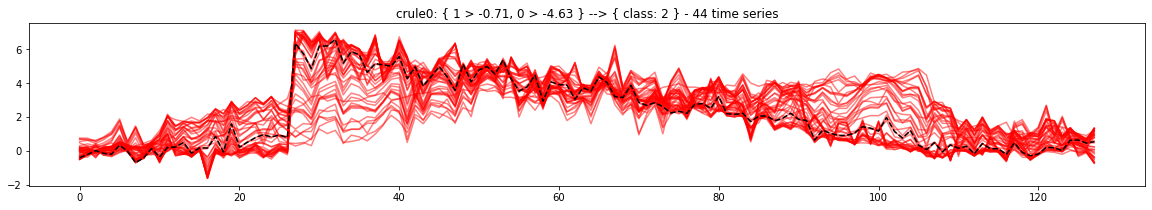

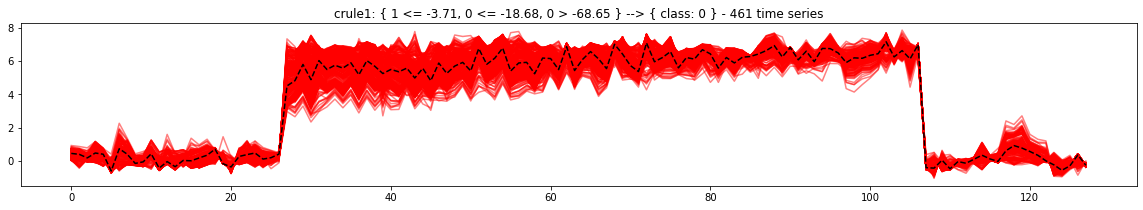

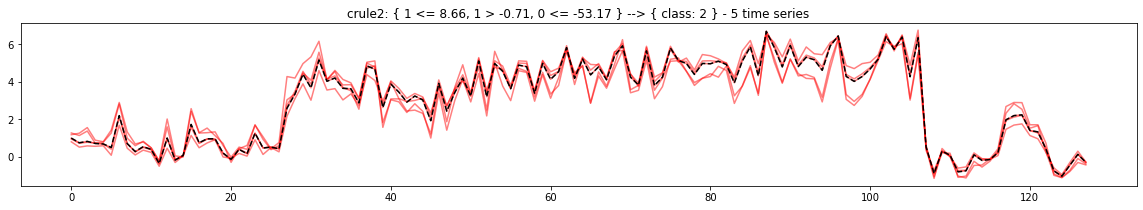

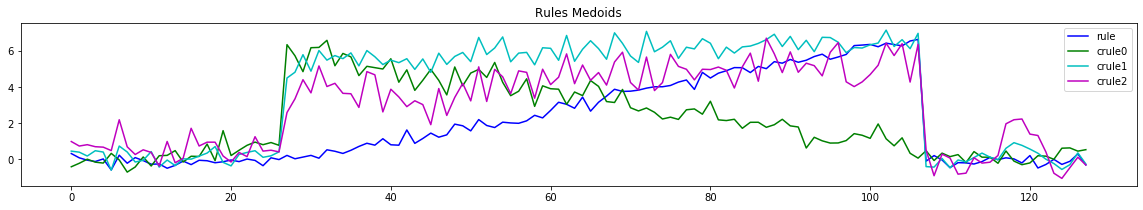

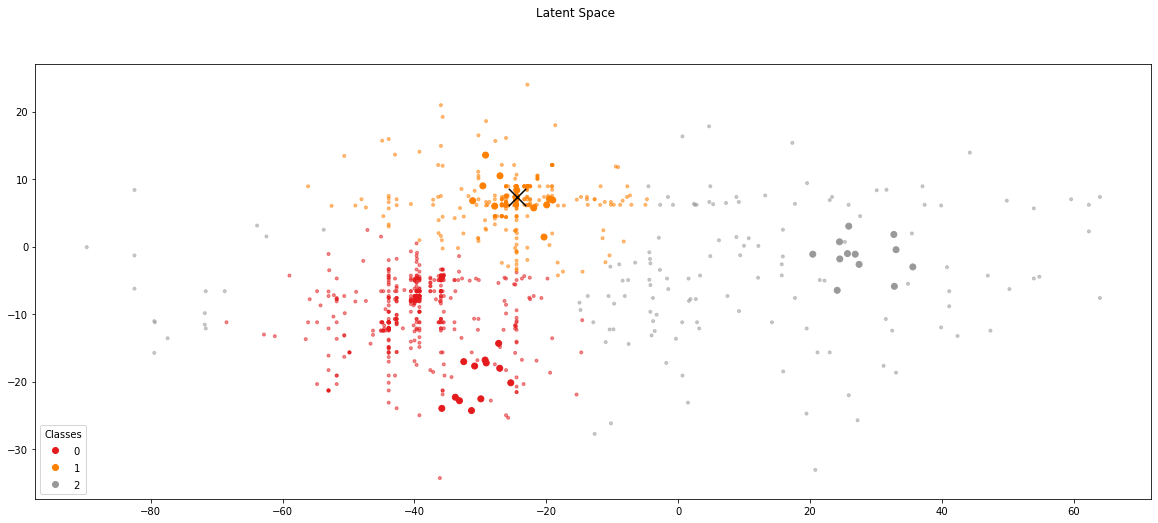

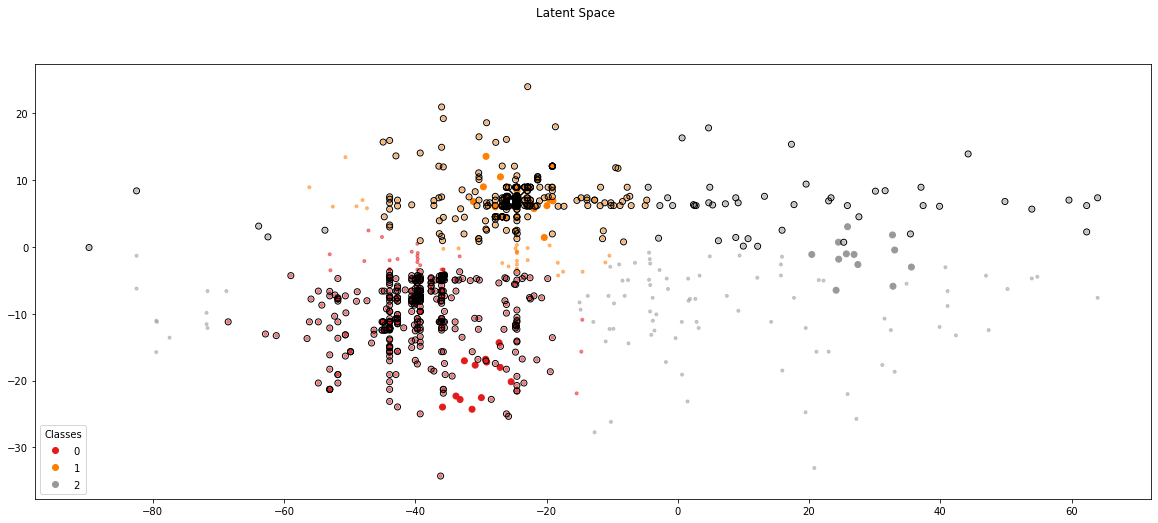

In [11]:
params = {"background": "linear_consecutive", 
              "rebuild_shapelet_explainer": True,
              "nsamples":500, 
              "shap_by_class" : False,
              #"optimizer": keras.optimizers.Adam(),#keras.optimizers.Adagrad(lr=.1), 
              "multishap_n":30}
agnostic.plot_explanation( 
                         rules = True, 
                         heatmap = False, 
                         shap_explanation = False, 
                         shapelet_explanation = False,
                         latent_space = True,
                         multi_shap_explanation = False,
                         figsize = (20,3),
                         VAE_2d = False,
                         **params
                         )